<a href="https://colab.research.google.com/github/christopherjneelankavil/car_price_prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense

In [ ]:
data.head(5)

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [ ]:
display(data.isnull().sum())

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

<Axes: >

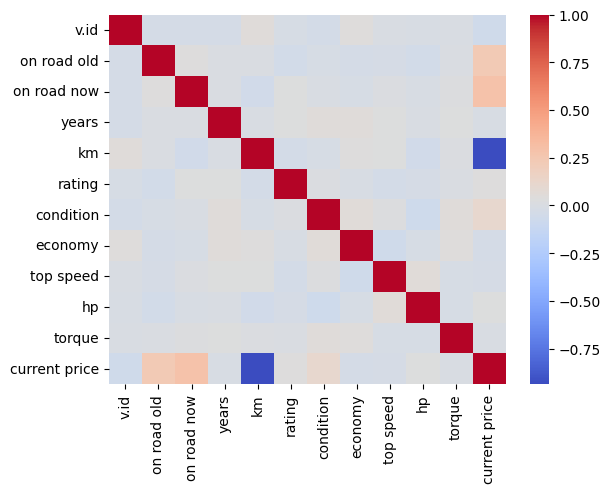

In [ ]:
sns.heatmap(data.corr(), cmap = 'coolwarm')

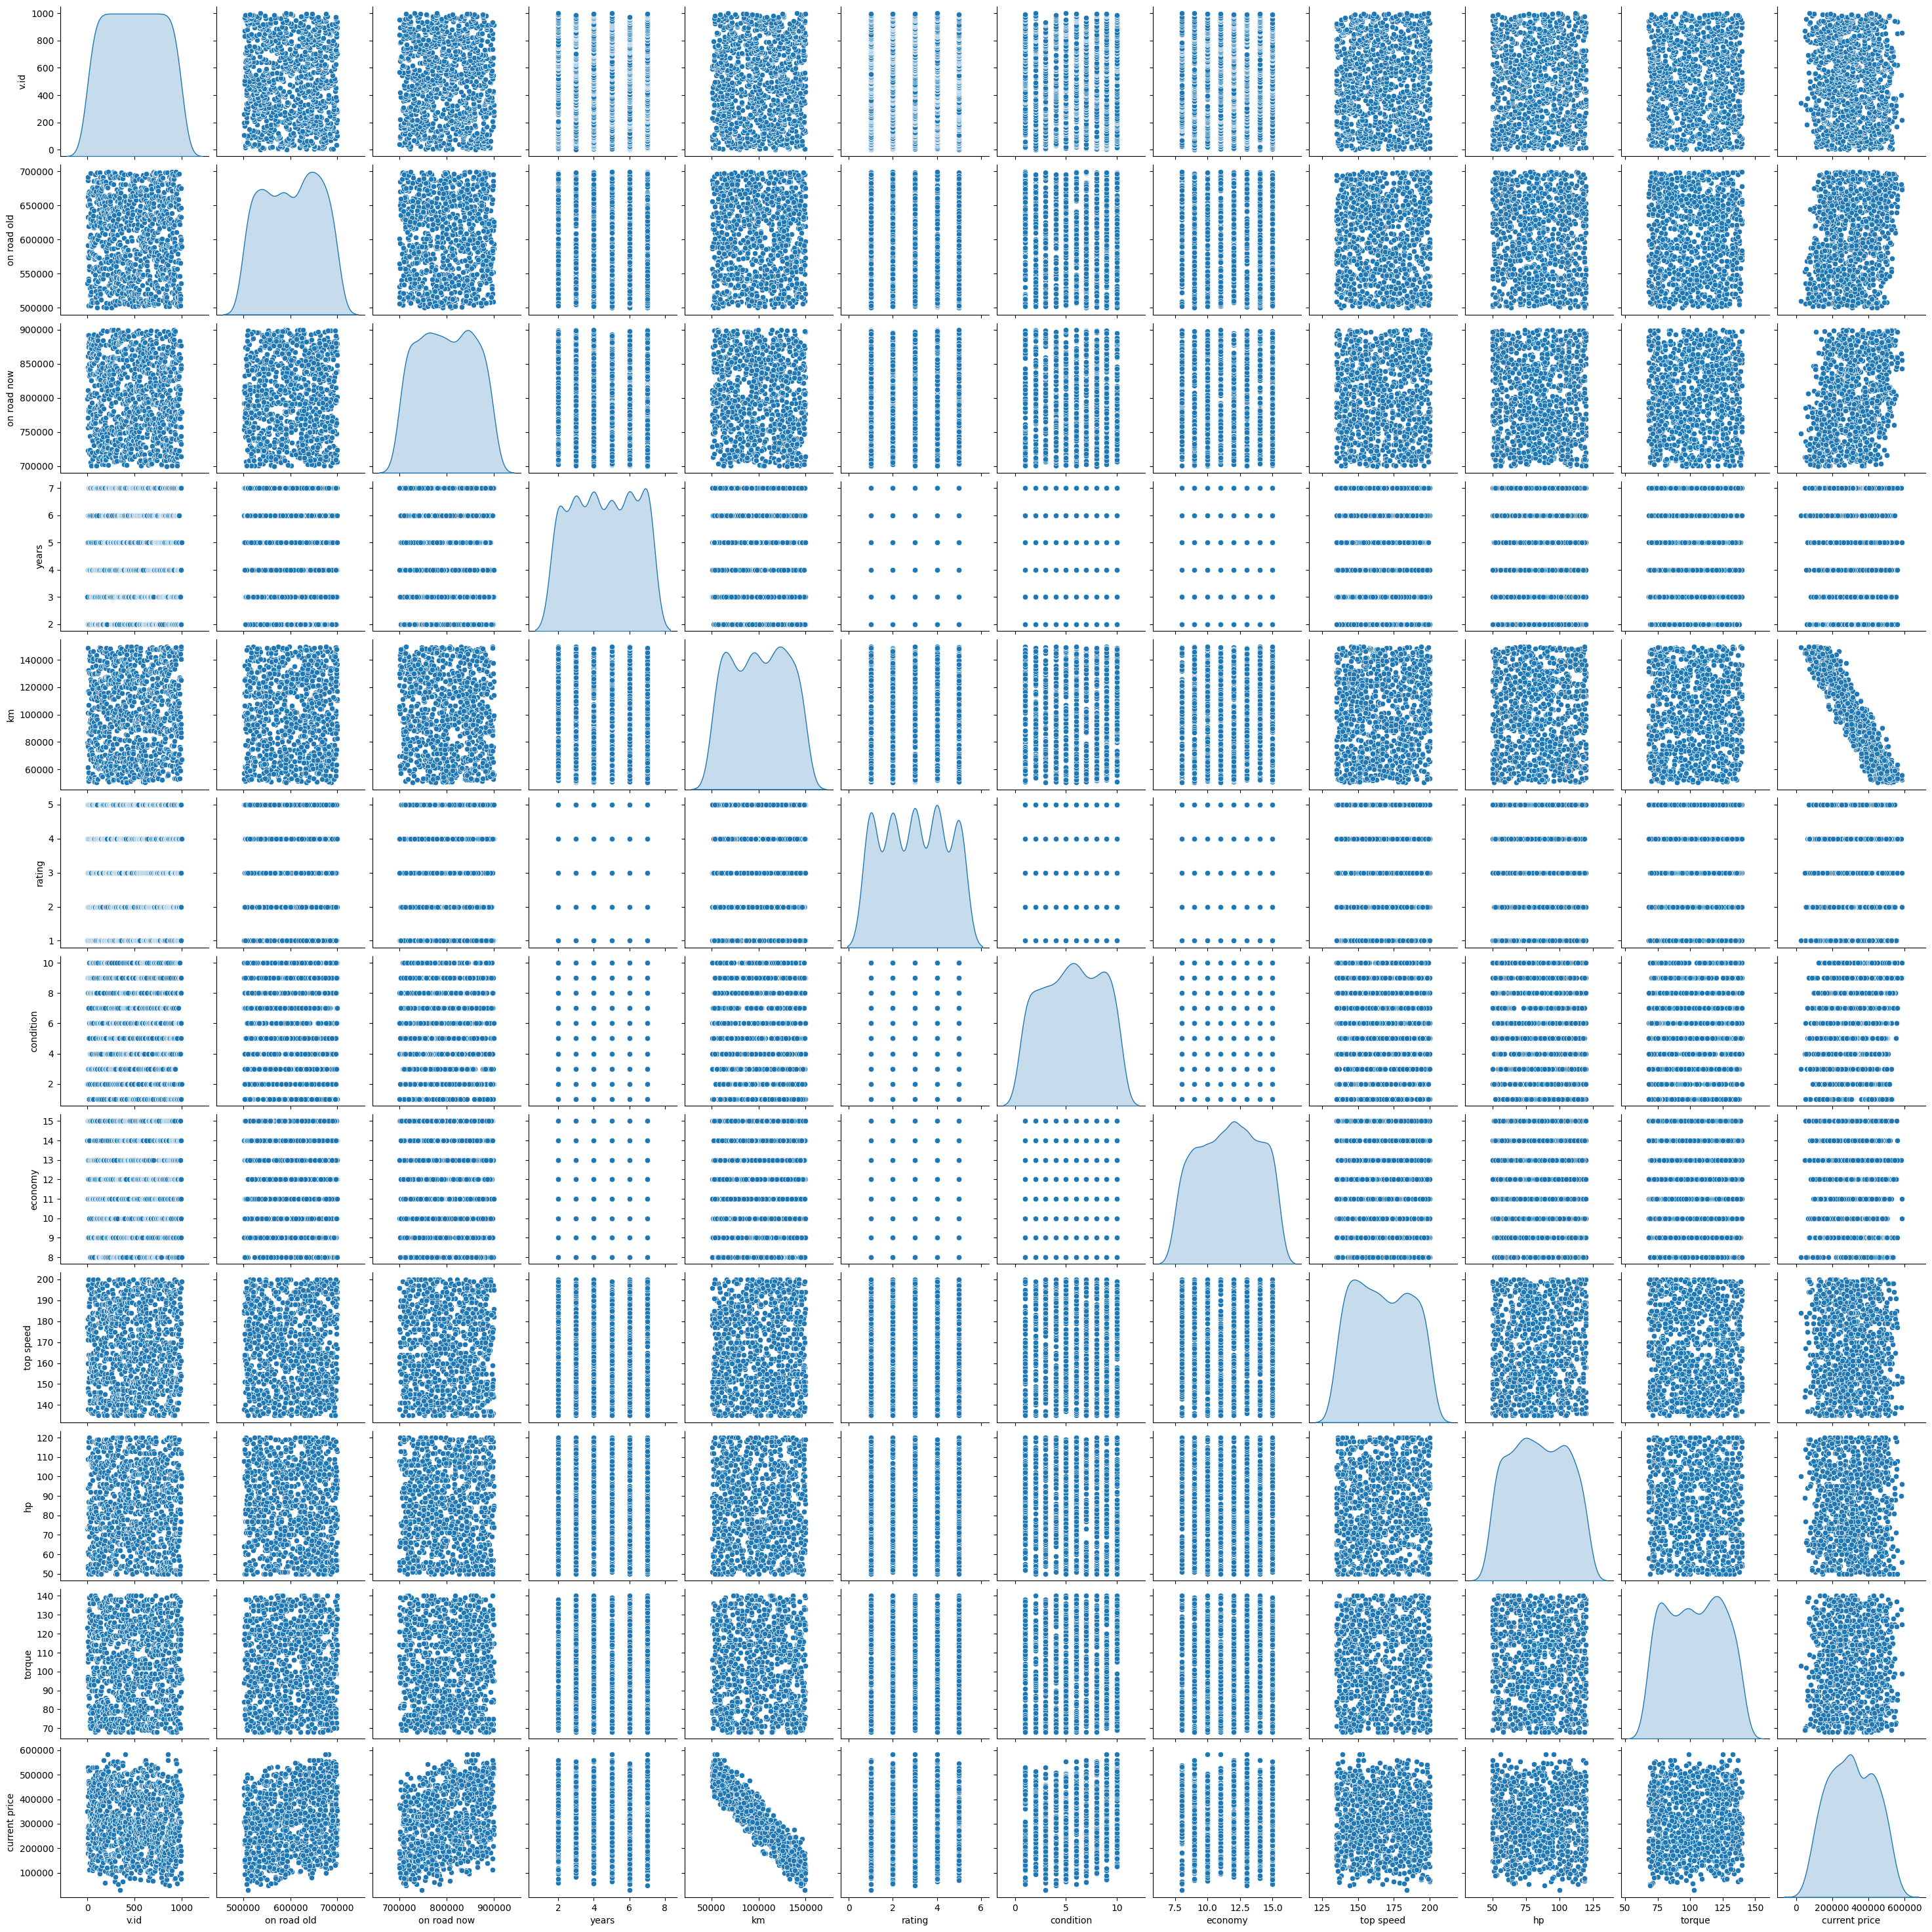

In [ ]:
sns.pairplot(data, diag_kind='kde')

In [ ]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [ ]:
tensor_data = tf.random.shuffle(tensor_data)

In [ ]:
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[2.050000e+02, 5.236370e+05, 8.160840e+05, 7.000000e+00,
        1.270420e+05, 5.000000e+00, 6.000000e+00, 1.100000e+01,
        1.350000e+02, 8.600000e+01, 8.200000e+01, 1.589515e+05],
       [2.590000e+02, 5.771680e+05, 7.350860e+05, 3.000000e+00,
        1.415540e+05, 1.000000e+00, 1.000000e+01, 1.400000e+01,
        1.780000e+02, 7.400000e+01, 9.500000e+01, 1.400615e+05],
       [5.500000e+01, 6.027220e+05, 8.349490e+05, 4.000000e+00,
        1.191310e+05, 1.000000e+00, 3.000000e+00, 9.000000e+00,
        1.810000e+02, 1.050000e+02, 1.370000e+02, 2.421735e+05],
       [6.560000e+02, 6.146710e+05, 8.504940e+05, 4.000000e+00,
        5.244300e+04, 2.000000e+00, 6.000000e+00, 1.500000e+01,
        1.630000e+02, 8.800000e+01, 1.240000e+02, 5.265025e+05],
       [1.320000e+02, 5.167470e+05, 7.804130e+05, 2.000000e+00,
        7.439600e+04, 1.000000e+00, 6.000000e+00, 1.500000e+01,
        1.590000e+02, 9.500000e+01, 1.340000e+02, 3

In [ ]:
X = tensor_data[:,3:-1]
X.shape

TensorShape([1000, 8])

In [ ]:
X[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[7.00000e+00, 1.27042e+05, 5.00000e+00, 6.00000e+00, 1.10000e+01,
        1.35000e+02, 8.60000e+01, 8.20000e+01],
       [3.00000e+00, 1.41554e+05, 1.00000e+00, 1.00000e+01, 1.40000e+01,
        1.78000e+02, 7.40000e+01, 9.50000e+01],
       [4.00000e+00, 1.19131e+05, 1.00000e+00, 3.00000e+00, 9.00000e+00,
        1.81000e+02, 1.05000e+02, 1.37000e+02],
       [4.00000e+00, 5.24430e+04, 2.00000e+00, 6.00000e+00, 1.50000e+01,
        1.63000e+02, 8.80000e+01, 1.24000e+02],
       [2.00000e+00, 7.43960e+04, 1.00000e+00, 6.00000e+00, 1.50000e+01,
        1.59000e+02, 9.50000e+01, 1.34000e+02]], dtype=float32)>

In [ ]:
y = tensor_data[:,-1]
y.shape

TensorShape([1000])

In [ ]:
y[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([158951.5, 140061.5, 242173.5, 526502.5, 355175. ], dtype=float32)>

In [ ]:
y = tf.expand_dims(y, axis=1)
y.shape

TensorShape([1000, 1])

In [ ]:
## Normalization

In [ ]:
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 1.4194926 ,  0.918716  ,  1.4350005 ,  0.14452522, -0.28034025,
        -1.6543103 ,  0.07090384, -1.0178072 ],
       [-0.90849847,  1.416796  , -1.4178832 ,  1.5614392 ,  1.065293  ,
         0.5761268 , -0.5142713 , -0.40017685],
       [-0.32650068,  0.64719516, -1.4178832 , -0.91816026, -1.177429  ,
         0.7317387 ,  0.9974311 ,  1.5952445 ],
       [-0.32650068, -1.6416663 , -0.7046622 ,  0.14452522,  1.5138373 ,
        -0.20193264,  0.16843303,  0.9776141 ],
       [-1.4904962 , -0.8881968 , -1.4178832 ,  0.14452522,  1.5138373 ,
        -0.40941516,  0.5097852 ,  1.4527144 ]], dtype=float32)>

In [ ]:
X[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[7.00000e+00, 1.27042e+05, 5.00000e+00, 6.00000e+00, 1.10000e+01,
        1.35000e+02, 8.60000e+01, 8.20000e+01],
       [3.00000e+00, 1.41554e+05, 1.00000e+00, 1.00000e+01, 1.40000e+01,
        1.78000e+02, 7.40000e+01, 9.50000e+01],
       [4.00000e+00, 1.19131e+05, 1.00000e+00, 3.00000e+00, 9.00000e+00,
        1.81000e+02, 1.05000e+02, 1.37000e+02],
       [4.00000e+00, 5.24430e+04, 2.00000e+00, 6.00000e+00, 1.50000e+01,
        1.63000e+02, 8.80000e+01, 1.24000e+02],
       [2.00000e+00, 7.43960e+04, 1.00000e+00, 6.00000e+00, 1.50000e+01,
        1.59000e+02, 9.50000e+01, 1.34000e+02]], dtype=float32)>

In [ ]:
model = tf.keras.Sequential([
    normalizer,
    Dense(1)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (1000, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)